In [2]:
import pandas as pd

In [3]:
# Load essential IMDb files
title_basics = pd.read_csv('../data/title.basics.tsv', sep='\t', na_values='\\N')
title_ratings = pd.read_csv('../data/title.ratings.tsv', sep='\t', na_values='\\N')
name_basics = pd.read_csv('../data/name.basics.tsv', sep='\t', na_values='\\N')

C:\Users\askar\AppData\Local\Temp\ipykernel_6284\13587132.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  title_basics = pd.read_csv('../data/title.basics.tsv', sep='\t', na_values='\\N')


In [4]:
title_principals = pd.read_csv('../data/title.principals.tsv', sep='\t', na_values='\\N')

In [16]:
title_basics.info()
title_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11223196 entries, 0 to 11223195
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
dtypes: float64(3), object(6)
memory usage: 770.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89005367 entries, 0 to 89005366
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 4.0+ GB


In [18]:
title_ratings.info()
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496265 entries, 0 to 1496264
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1496265 non-null  object 
 1   averageRating  1496265 non-null  float64
 2   numVotes       1496265 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 34.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13933215 entries, 0 to 13933214
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   nconst             object 
 1   primaryName        object 
 2   birthYear          float64
 3   deathYear          float64
 4   primaryProfession  object 
 5   knownForTitles     object 
dtypes: float64(2), object(4)
memory usage: 637.8+ MB


In [ ]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,"Comedy,Short"


In [ ]:
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2097
1,tt0000002,5.6,282
2,tt0000003,6.5,2117
3,tt0000004,5.4,182
4,tt0000005,6.2,2847


In [57]:
title_ratings['numVotes'] = pd.to_numeric(title_ratings['numVotes'], errors='coerce')

In [61]:
title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1496265 entries, 0 to 1496264
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1496265 non-null  object 
 1   averageRating  1496265 non-null  float64
 2   numVotes       1496265 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 34.2+ MB


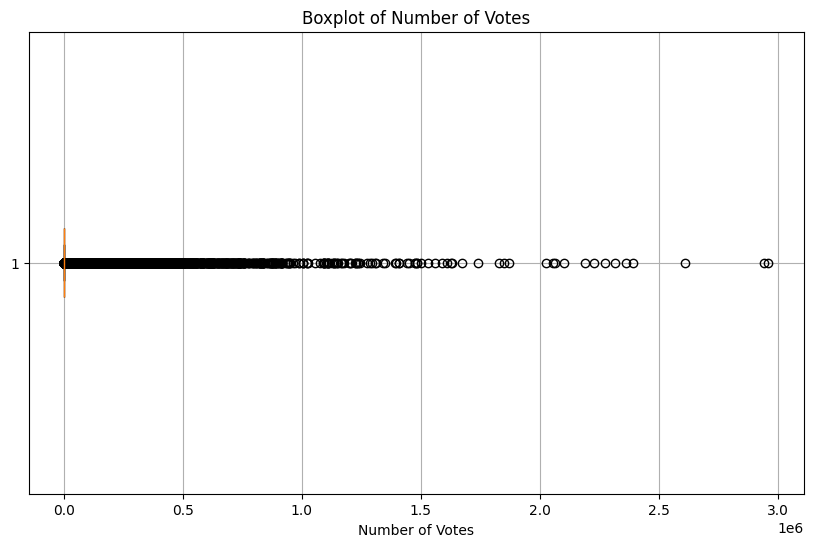

In [60]:
plt.figure(figsize=(10, 6))
plt.boxplot(title_ratings['numVotes'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'))
plt.title('Boxplot of Number of Votes')
plt.xlabel('Number of Votes')
plt.grid(True)
plt.show()

In [62]:
mean_votes = title_ratings['numVotes'].mean()
median_votes = title_ratings['numVotes'].median()
min_votes = title_ratings['numVotes'].min()
max_votes = title_ratings['numVotes'].max()

# Print the statistics
print(f"Mean: {mean_votes}")
print(f"Median: {median_votes}")
print(f"Min: {min_votes}")
print(f"Max: {max_votes}")

Mean: 1028.8901097065025
Median: 26.0
Min: 5
Max: 2959782


In [71]:
count_above_5000 = (title_ratings['numVotes'] > 1000000).sum()
count_between_1000_and_5000 = ((title_ratings['numVotes'] > 20000) & (title_ratings['numVotes'] < 100000)).sum()
count_between_min = ((title_ratings['numVotes'] > 5000) & (title_ratings['numVotes'] < 20000)).sum()

print(f"Number of entries with votes between 5000 and 10000: {count_between_1000_and_5000}")


print(f"Number of entries with votes above 10000: {count_above_5000}")

print(f"Number of entries with votes below 5000 and above 1000: {count_between_min}")


Number of entries with votes between 5000 and 10000: 6867
Number of entries with votes above 10000: 80
Number of entries with votes below 5000 and above 1000: 16836


In [8]:
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0069467,tt0083922,tt0050976"


In [19]:
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0005690,producer,producer,NaN
3,tt0000001,4,nm0374658,cinematographer,director of photography,NaN
4,tt0000002,1,nm0721526,director,NaN,NaN


In [5]:
title_basics = title_basics.dropna(subset=['primaryTitle', 'genres'])

In [6]:
title_ratings = title_ratings.dropna(subset=['averageRating', 'numVotes'])

In [7]:
title_principals = title_principals.dropna(subset=['category'])

In [8]:
unique_values = title_basics['titleType'].unique()

print(unique_values)


['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame']


In [8]:
title_basics = title_basics[title_basics['titleType'].isin(['movie', 'tvSeries', 'tvMovie', 'tvMiniSeries'])]

In [9]:
# Spliting genres into lists
title_basics['genres'] = title_basics['genres'].str.split(',')

In [10]:
title_basics['startYear'] = pd.to_numeric(title_basics['startYear'], errors='coerce')
title_basics['runtimeMinutes'] = pd.to_numeric(title_basics['runtimeMinutes'], errors='coerce')

In [11]:
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,[Romance]
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,"[Documentary, News, Sport]"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,"[Action, Adventure, Biography]"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90.0,[Drama]
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,NaN,NaN,[Drama]


In [12]:
# Merging ratings into title_basics
title_data = pd.merge(title_basics, title_ratings, on='tconst', how='left')

In [13]:
title_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,[Romance],5.4,215.0
1,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0.0,1897.0,NaN,100.0,"[Documentary, News, Sport]",5.2,539.0
2,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0.0,1906.0,NaN,70.0,"[Action, Adventure, Biography]",6.0,938.0
3,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0.0,1907.0,NaN,90.0,[Drama],5.7,28.0
4,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0.0,1907.0,NaN,NaN,[Drama],4.3,27.0


In [14]:
unique_values1 = title_data['averageRating'].unique()

print(unique_values1)

[ 5.4  5.2  6.   5.7  4.3  3.   4.2  4.7  4.6  4.   nan  3.8  5.3  5.5
  7.4  8.1  6.5  5.8  3.6  5.9  4.1  4.5  5.1  7.   4.4  6.4  7.8  5.
  6.6  6.1  4.9  6.2  5.6  7.5  7.3  6.8  6.9  3.7  6.3  3.3  7.6  6.7
  7.1  8.   2.7  7.2  7.9  8.2  2.2  1.4  3.5  3.4  2.5  8.8  1.9  3.9
  8.3  2.8  2.6  4.8  8.4  2.3  7.7  8.5  9.   2.9  3.2  2.4  1.7  8.6
  1.1  1.   1.6  2.1  3.1  1.8  2.   1.3  8.7  9.4  9.5  8.9  9.3  9.2
  9.1  9.7  9.8  9.6  9.9 10.   1.5  1.2]


In [15]:
# Merging principal cast/crew information
title_data = pd.merge(title_data, title_principals, on='tconst', how='left')

In [16]:
title_data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,nconst,category,job,characters
0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,[Romance],5.4,215.0,1.0,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,[Romance],5.4,215.0,2.0,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,[Romance],5.4,215.0,3.0,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,[Romance],5.4,215.0,4.0,nm0085156,director,NaN,NaN
4,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894.0,NaN,45.0,[Romance],5.4,215.0,5.0,nm0085156,writer,NaN,NaN


In [ ]:
title_data = title_data.drop(columns=['isAdult', 'ordering'], inplace=True)

In [22]:
title_data = title_data.drop(columns=['job'])

In [23]:
title_data.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,characters
0,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,NaN,45.0,[Romance],5.4,215.0,nm0063086,actress,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,NaN,45.0,[Romance],5.4,215.0,nm0183823,actor,"[""Mr. Hamilton""]"
2,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,NaN,45.0,[Romance],5.4,215.0,nm1309758,actor,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,NaN,45.0,[Romance],5.4,215.0,nm0085156,director,NaN
4,tt0000009,movie,Miss Jerry,Miss Jerry,1894.0,NaN,45.0,[Romance],5.4,215.0,nm0085156,writer,NaN


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
title_data_filtered = title_data[title_data['numVotes'] < title_data['numVotes'].quantile(0.95)]

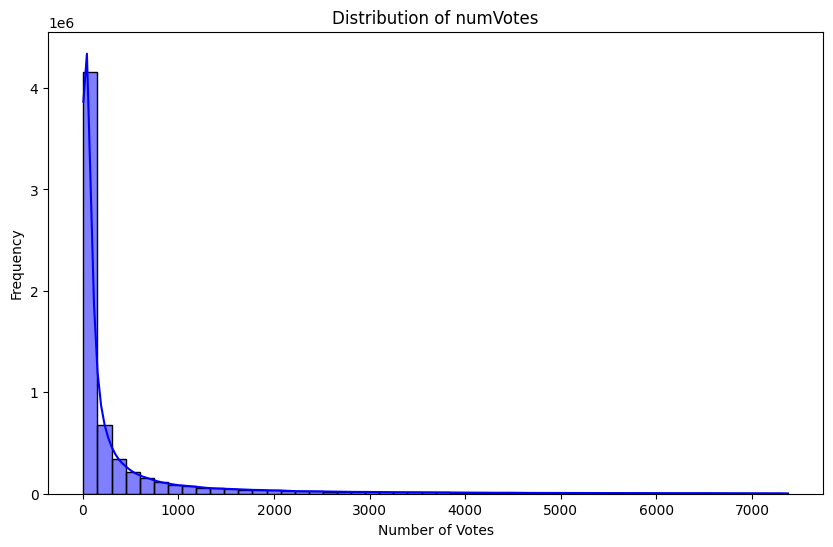

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(title_data_filtered['numVotes'], bins=50, kde=True, color='blue')
plt.title('Distribution of numVotes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.show()

In [ ]:
title_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11036841 entries, 0 to 11036840
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   startYear       float64
 5   endYear         float64
 6   runtimeMinutes  float64
 7   genres          object 
 8   averageRating   float64
 9   numVotes        float64
 10  nconst          object 
 11  category        object 
 12  characters      object 
dtypes: float64(5), object(8)
memory usage: 1.1+ GB


In [34]:
title_data = title_data[(title_data['numVotes'] >= 1000)]

In [35]:
title_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1087708 entries, 410 to 11036662
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1087708 non-null  object 
 1   titleType       1087708 non-null  object 
 2   primaryTitle    1087708 non-null  object 
 3   originalTitle   1087708 non-null  object 
 4   startYear       1087708 non-null  float64
 5   endYear         120611 non-null   float64
 6   runtimeMinutes  1070360 non-null  float64
 7   genres          1087708 non-null  object 
 8   averageRating   1087708 non-null  float64
 9   numVotes        1087708 non-null  float64
 10  nconst          1087682 non-null  object 
 11  category        1087682 non-null  object 
 12  characters      601516 non-null   object 
dtypes: float64(5), object(8)
memory usage: 116.2+ MB


In [40]:
title_data

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,characters
410,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0660139,actor,"[""Dante Alighieri""]"
411,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0685283,actor,"[""Virgilio""]"
412,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0209738,actor,"[""Farinata degli Uberti""]"
413,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0209738,actor,"[""Pier delle Vigne""]"
414,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0209738,actor,"[""Il conte Ugolino""]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11036658,tt9916362,movie,Coven,Akelarre,2020.0,NaN,92.0,"[Drama, History]",6.4,5936.0,nm0284765,editor,NaN
11036659,tt9916362,movie,Coven,Akelarre,2020.0,NaN,92.0,"[Drama, History]",6.4,5936.0,nm2857592,casting_director,NaN
11036660,tt9916362,movie,Coven,Akelarre,2020.0,NaN,92.0,"[Drama, History]",6.4,5936.0,nm1486091,casting_director,NaN
11036661,tt9916362,movie,Coven,Akelarre,2020.0,NaN,92.0,"[Drama, History]",6.4,5936.0,nm7266158,casting_director,NaN


In [42]:
title_data.to_csv('../data/cleaned_title_data.csv', index=False)

In [43]:
merged_data = pd.merge(title_data, name_basics[['nconst', 'primaryName']], 
                       left_on='nconst', right_on='nconst', how='left')

In [44]:
merged_data

,tconst,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category,characters,primaryName
0,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0660139,actor,"[""Dante Alighieri""]",Salvatore Papa
1,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0685283,actor,"[""Virgilio""]",Arturo Pirovano
2,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0209738,actor,"[""Farinata degli Uberti""]",Giuseppe de Liguoro
3,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0209738,actor,"[""Pier delle Vigne""]",Giuseppe de Liguoro
4,tt0002130,movie,Dante's Inferno,L'inferno,1911.0,NaN,71.0,"[Adventure, Drama, Fantasy]",7.0,3651.0,nm0209738,actor,"[""Il conte Ugolino""]",Giuseppe de Liguoro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087703,tt9916362,movie,Coven,Akelarre,2020.0,NaN,92.0,"[Drama, History]",6.4,5936.0,nm0284765,editor,NaN,Teresa Font
1087704,tt9916362,movie,Coven,Akelarre,2020.0,NaN,92.0,"[Drama, History]",6.4,5936.0,nm2857592,casting_director,NaN,Txabe Atxa
1087705,tt9916362,movie,Coven,Akelarre,2020.0,NaN,92.0,"[Drama, History]",6.4,5936.0,nm1486091,casting_director,NaN,Nathalie Camidebach
1087706,tt9916362,movie,Coven,Akelarre,2020.0,NaN,92.0,"[Drama, History]",6.4,5936.0,nm7266158,casting_director,NaN,Florencia Inés González


In [49]:
merged_data.drop(columns=['endYear', 'runtimeMinutes'], inplace=True)

In [72]:
merged_data['genres'] = merged_data['genres'].apply(lambda x: ', '.join(x))

In [77]:
merged_data['startYear'] = merged_data['startYear'].astype(int)

In [78]:
merged_data

,tconst,titleType,primaryTitle,originalTitle,startYear,genres,averageRating,numVotes,nconst,category,characters,primaryName
0,tt0002130,movie,Dante's Inferno,L'inferno,1911,"Adventure, Drama, Fantasy",7.0,3651.0,nm0660139,actor,"[""Dante Alighieri""]",Salvatore Papa
1,tt0002130,movie,Dante's Inferno,L'inferno,1911,"Adventure, Drama, Fantasy",7.0,3651.0,nm0685283,actor,"[""Virgilio""]",Arturo Pirovano
2,tt0002130,movie,Dante's Inferno,L'inferno,1911,"Adventure, Drama, Fantasy",7.0,3651.0,nm0209738,actor,"[""Farinata degli Uberti""]",Giuseppe de Liguoro
3,tt0002130,movie,Dante's Inferno,L'inferno,1911,"Adventure, Drama, Fantasy",7.0,3651.0,nm0209738,actor,"[""Pier delle Vigne""]",Giuseppe de Liguoro
4,tt0002130,movie,Dante's Inferno,L'inferno,1911,"Adventure, Drama, Fantasy",7.0,3651.0,nm0209738,actor,"[""Il conte Ugolino""]",Giuseppe de Liguoro
...,...,...,...,...,...,...,...,...,...,...,...,...
1087703,tt9916362,movie,Coven,Akelarre,2020,"Drama, History",6.4,5936.0,nm0284765,editor,NaN,Teresa Font
1087704,tt9916362,movie,Coven,Akelarre,2020,"Drama, History",6.4,5936.0,nm2857592,casting_director,NaN,Txabe Atxa
1087705,tt9916362,movie,Coven,Akelarre,2020,"Drama, History",6.4,5936.0,nm1486091,casting_director,NaN,Nathalie Camidebach
1087706,tt9916362,movie,Coven,Akelarre,2020,"Drama, History",6.4,5936.0,nm7266158,casting_director,NaN,Florencia Inés González


In [79]:
merged_data.to_csv('../data/films_data.csv', index=False)

In [85]:
merged_2000 = merged_data[merged_data['numVotes'] > 2000]
merged_2000.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737614 entries, 0 to 1087707
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         737614 non-null  object 
 1   titleType      737614 non-null  object 
 2   primaryTitle   737614 non-null  object 
 3   originalTitle  737614 non-null  object 
 4   startYear      737614 non-null  int64  
 5   genres         737614 non-null  object 
 6   averageRating  737614 non-null  float64
 7   numVotes       737614 non-null  float64
 8   nconst         737603 non-null  object 
 9   category       737603 non-null  object 
 10  characters     405766 non-null  object 
 11  primaryName    737603 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 73.2+ MB


In [83]:
terciles = merged_2000['numVotes'].quantile([1/3, 2/3])

print("Terciles:")
print(terciles)

Terciles:
0.333333     3969.0
0.666667    12763.0
Name: numVotes, dtype: float64


In [75]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087708 entries, 0 to 1087707
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1087708 non-null  object 
 1   titleType      1087708 non-null  object 
 2   primaryTitle   1087708 non-null  object 
 3   originalTitle  1087708 non-null  object 
 4   startYear      1087708 non-null  float64
 5   genres         1087708 non-null  object 
 6   averageRating  1087708 non-null  float64
 7   numVotes       1087708 non-null  float64
 8   nconst         1087682 non-null  object 
 9   category       1087682 non-null  object 
 10  characters     601516 non-null   object 
 11  primaryName    1087682 non-null  object 
dtypes: float64(3), object(9)
memory usage: 99.6+ MB
